In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns

from matplotlib import cm

In [2]:
output_path = Path('outputs_lab2')

data = {}

representations = []
fitnesses = []

for f in output_path.iterdir():
    name_split = f.name.split('_')
    fitness_type = "default" if name_split[1] == 'df' else "new"
    representation = name_split[2]

    if fitness_type not in fitnesses:
        fitnesses.append(fitness_type)

    if representation not in representations:
        representations.append(representation)

    combined_type = (fitness_type, representation)
    if combined_type not in data:
        data[combined_type] = {
            'std': [],
            'max': [],
            'runtime': []
        }

    run_data = pd.read_csv(f)

    data[combined_type]['std'].append(run_data.stdev.to_numpy())
    data[combined_type]['max'].append(run_data['max'].to_numpy())
    data[combined_type]['runtime'].append(run_data['runtime'][0])

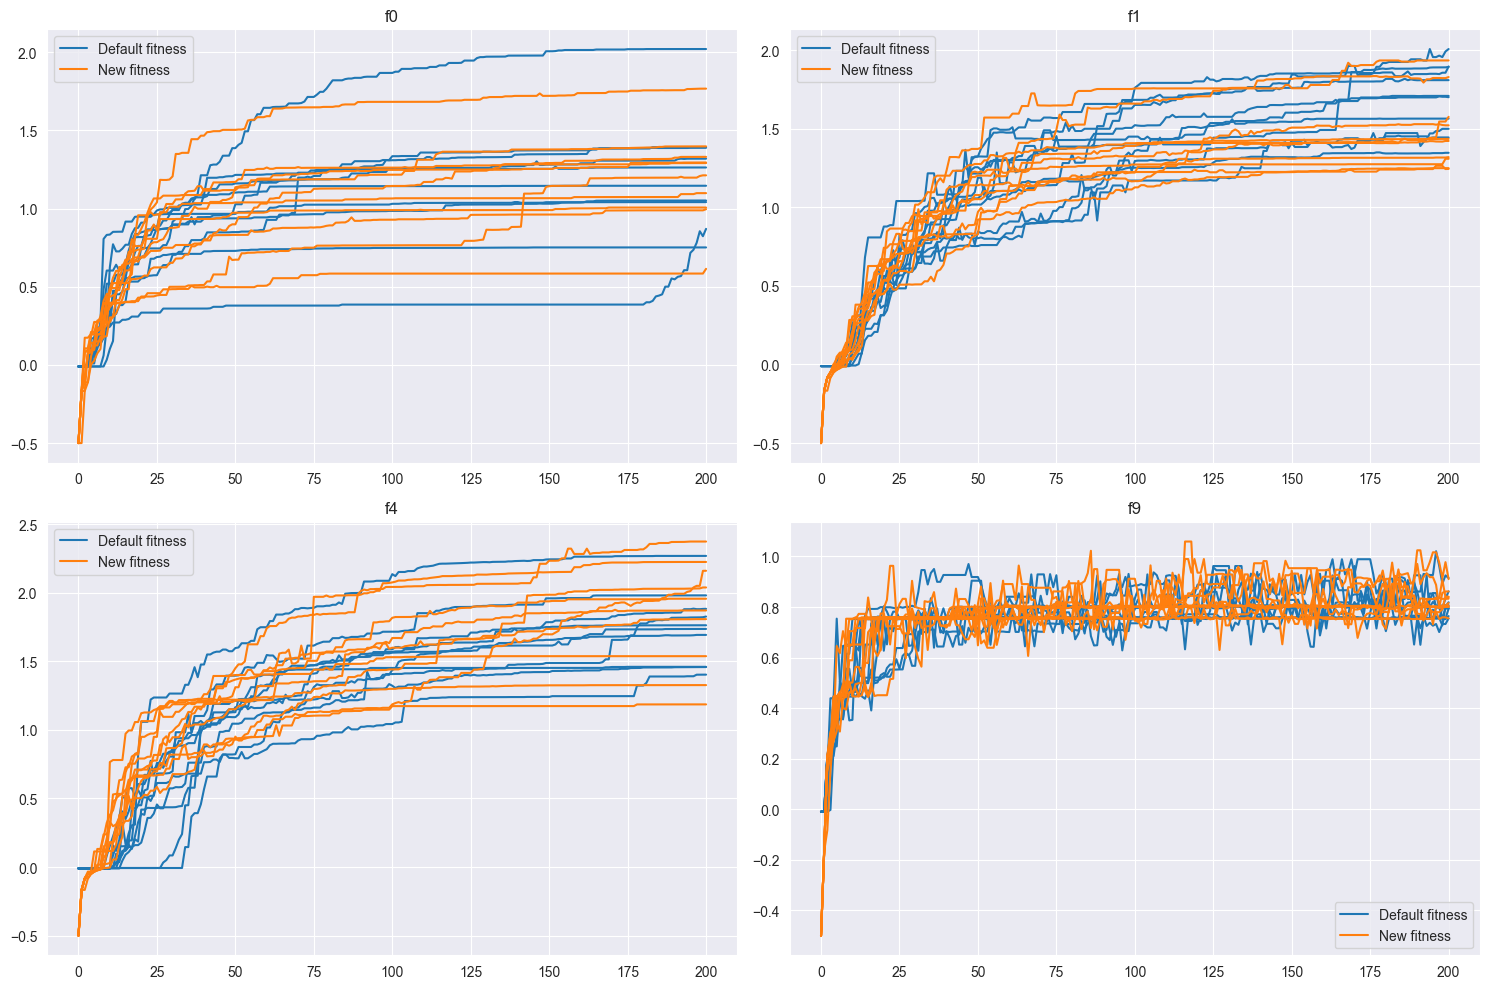

In [8]:
fig = plt.figure(figsize=(15,10))

i = 0

colors = sns.color_palette("tab10", len(fitnesses))  # Generate colors
fitness_colors = dict(zip(fitnesses, colors))

for representation in representations:
    i += 1

    ax = fig.add_subplot(2,2,i)
    ax.set_title(f'f{representation}')
    for f in fitnesses:
        t_data = data[(f, representation)]

        lab = f.capitalize() + " fitness"

        for m in t_data['max']:
            ax.plot(m, label=lab, color=fitness_colors[f])

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

fig.tight_layout()


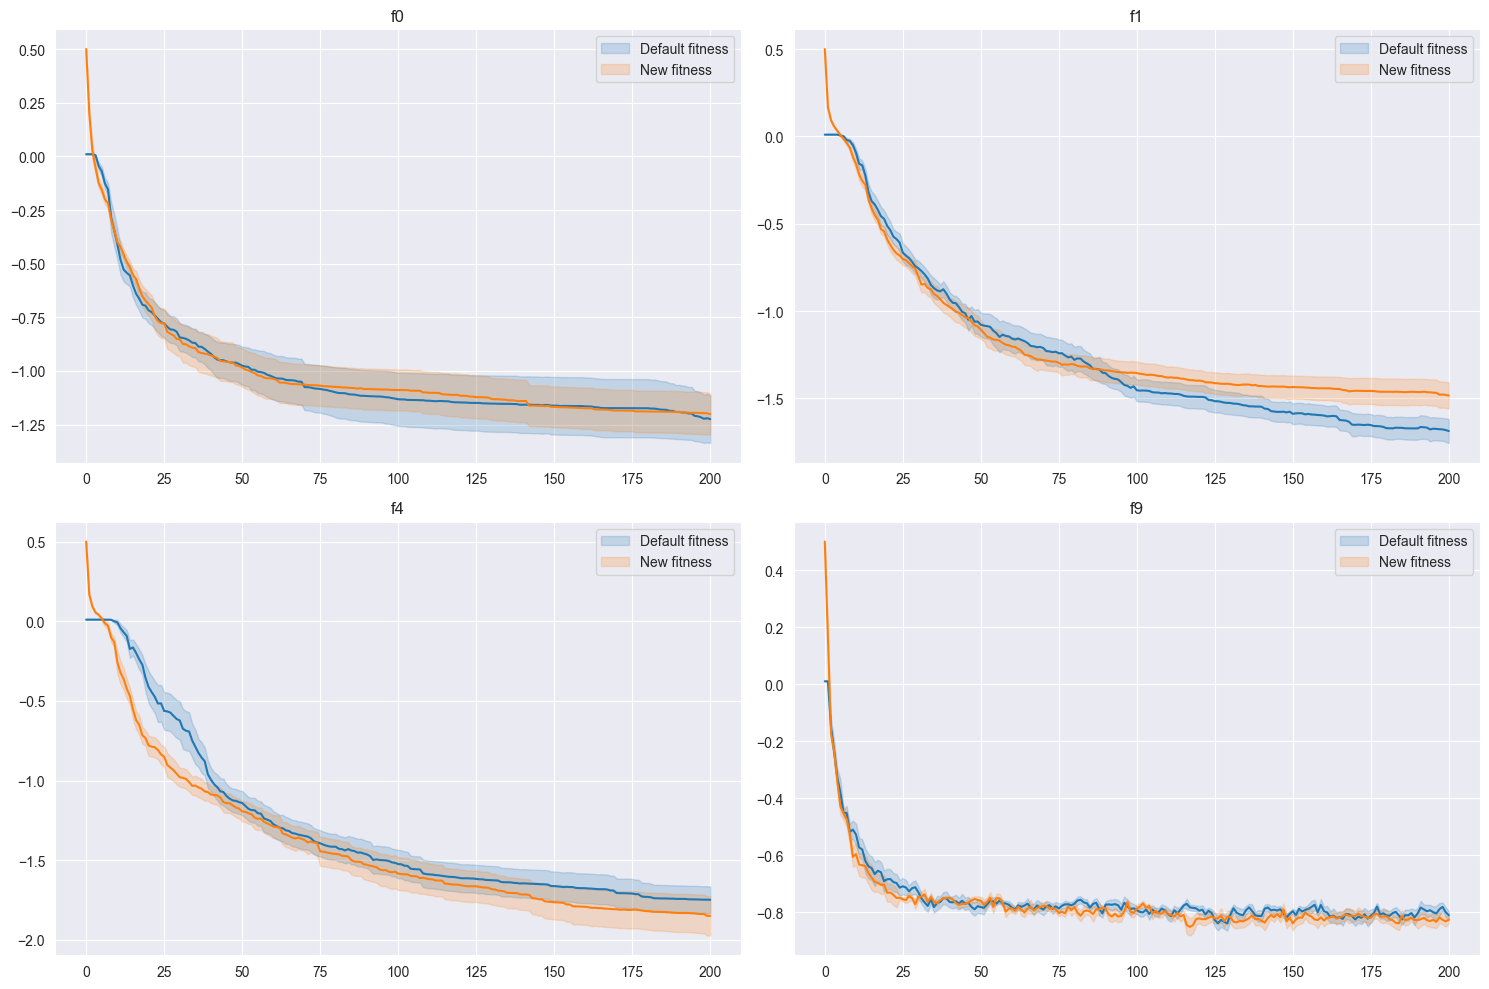

In [9]:
fig = plt.figure(figsize=(15,10))

i = 0

colors = sns.color_palette("tab10", len(fitnesses))  # Generate colors
fitness_colors = dict(zip(fitnesses, colors))

for representation in representations:
    i += 1

    ax = fig.add_subplot(2,2,i)
    ax.set_title(f'f{representation}')
    for f in fitnesses:
        t_data = data[(f, representation)]
        max_data = np.array(t_data['max'])
        avg_mean = -np.mean(max_data, axis=0)
        avg_std = np.std(max_data, axis=0) / 3

        lab = f.capitalize() + " fitness"

        x = list(range(max_data.shape[1]))

        ax.plot(avg_mean, label=lab, color=fitness_colors[f])
        ax.fill_between(x, avg_mean-avg_std, avg_mean+avg_std, alpha=0.2, label=lab, color=fitness_colors[f])

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

fig.tight_layout()


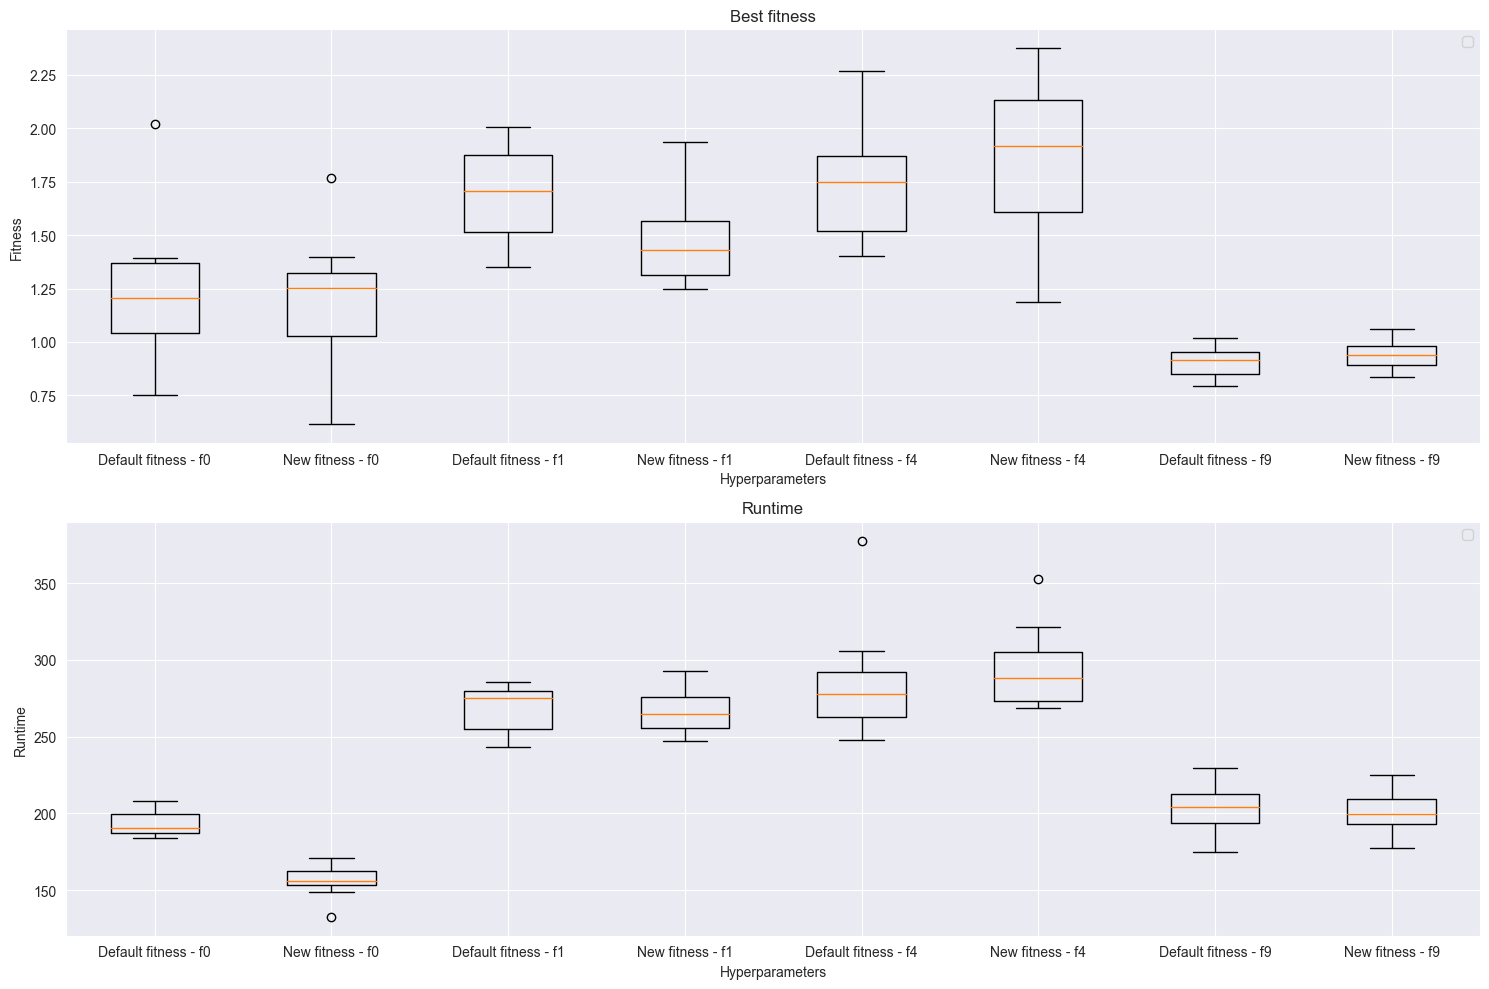

In [11]:
fig = plt.figure(figsize=(15, 10))

i = 0

y = []
x = []
labs = []

i += 1
ax = fig.add_subplot(2,1,i)
ax.set_title('Best fitness')

for representation in representations:

    for f in fitnesses:
        t_data = data[(f, representation)]
        max_data = np.array(t_data['max'])
        max_es = np.max(max_data, axis=1)

        lab = f.capitalize() + " fitness - f"+representation
        labs.append(lab)

        y.append(max_es)
        if len(x) == 0:
            x.append(1)
        else:
            x.append(x[-1] + 1)

ax.boxplot(y,positions=x, labels=labs)

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
ax.set_ylabel('Fitness')
ax.set_xlabel('Hyperparameters')


y = []
x = []
labs = []

i += 1
ax = fig.add_subplot(2,1,i)
ax.set_title('Runtime')

for representation in representations:

    for f in fitnesses:
        t_data = data[(f, representation)]
        r_data = np.array(t_data['runtime'])

        lab = f.capitalize() + " fitness - f"+representation
        labs.append(lab)

        y.append(r_data)
        if len(x) == 0:
            x.append(1)
        else:
            x.append(x[-1] + 1)

ax.boxplot(y,positions=x, labels=labs)

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
ax.set_ylabel('Runtime')
ax.set_xlabel('Hyperparameters')

fig.tight_layout()
